<h1 style="text-align:center;">Modeling of the Boltzmann distribution - A computer lab</h1> 

Author: Radost Herboth, last edited on 13/09/2021

<h4 style="font-size:150%;">How to use this Notebook</h4>

Jupyter Notebooks are an interactive interface for Python 3 that allow you to execute code snippets in so-called cells. All executable cells will have 'In [..]' on the left side. For example, we need to import some helpful libraries, so just execute the next cell by clicking on it and pressing Ctrl+Enter.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import simbo_class as sc

The last line in the previous cell imports a module called <i>simbo_class</i>, which has all the functionalities we need to run a simulation. The following is a tutorial on how to do that; note that you have to do these steps in the order they are presented here for the simulation to run.

**Initial input**

You will have the option to change the number of molecules (<i>number_of_molecules</i>), the average energy of molecules (<i>average_energy</i>) and the spacing of the energy levels $\tilde\nu$ (<i>nu</i>). Most exercises will ask you to change the number of molecules, but there will be one where you will have to change the spacing of the energy levels. In that case, remember to keep the 'e2' after your number, it will help convert the units later. If you have set all your parameters, just execute the cell below as you did before.

In [6]:
number_of_molecules = 2 
average_energy = 2 
nu = 500e2

rs = sc.run_simbo(average_energy, number_of_molecules, nu)

**Generating the intial state**

Now we need to generate an initial state with the molecules distributed over the energy levels. You can either let <i>simbo_class</i> generate this state automatically and just execute the next cell

In [31]:
levels = sc.run_simbo.generate_levels(rs)

OR you can define this state yourself by removing the # sign at the beginning of the next line and putting in your own values. Remember that you should have the same number of values in the square bracket as you have molecules and that they should be separated by commas (eg. here, we have three values since the default number of molecules is three). Once you have done that, execute the cell as before (Note: If you forget to remove the #, executing this line will simply do nothing). 

In [7]:
levels = [5, 5]

**Running a simulation**

Ok, let's run the simulation! By default, there will be $20*N$ ($N$ being the number of molecules) equilibration steps, before it starts to store the data. You can set the number of steps for data collection yourself by setting <i>nstot</i> to different values; here it is set to $100*N$, but you may want to change it later.

In [8]:
nstot = 200*number_of_molecules

(dist_sum, all_levels, all_distr, all_dist_sum, all_uav, all_wbolt, all_sw, all_sa, all_temp, max_level, 
     max_dist, max_distr_sum) = sc.run_simbo.run(rs, levels, nstot)

KeyboardInterrupt: 

Now, all the data generated by the simulation is stored in your RAM and you can look at it by running the next cell. It will show you three graphs and a couple of values.

The first graph on the top left is an animation of the energy levels, so it shows which molecule occupies which energy level at a certain time step. Note that the animation will start at a higher number, because of the equilibration. The second graph on the top right is an animation of the distribution of levels, i.e. it shows how many molecules are in a certain energy level at a certain time step. As with the first graph, it will only start after equilibration.

The third graph on the bottom left is an animation of the average distribution of levels, so it shows how many molecules have been in this energy level on average so far. For this, the simulation will accumulate the data of the previous graph and average it over time, therefore the number of accumulated steps is counted here (which is exactly the current step minus the number of equilibration steps). Note that this distribution shows the average number of molecules in the given state.  In order to get the probability distribution over the energy levels, one must divide this function by the number of molecules, $N$.  

The animation will also display some thermodynamic data on the bottom right. Here, you can choose if you want this data to be in default (energies/entropies in kJ/mol, temperature in K) or in reduced units by setting <i>units</i> to either 'default' or 'reduced' (don't forget the quotation marks here or it will not work). You can also decrease the speed of the animation by setting <i>time_per_step</i> to a higher value. It is set to 2000 now, so you can really see the changes in the energy levels of the molecules as they exchange energy in the first graph and how that translates to the distribution of energy levels in the second graph. In later tasks however, you may want to decrease <i>time_per_step</i> again, as simulations of a lot of molecules will take longer to be animated (remember, each simulation runs for $20*N$ steps).

(Note: The graphs may take a second or two to start being updated and another second to snap to the surrounding frame, so just have a little patience here. The animation is moreover displayed in interactive mode, which means you can stop it at any time using the blue off button on the top right or take screenshots of the current step by pressing the save icon on the bottom right. The latter will take you to a separate tab where you can download the image as a PNG. Note that the animation will keep running while you are away from the notebook tab, so make sure to adjust the <i>time_per_step</i> accordingly to leave enough time for you to come back to it.)

<IPython.core.display.Javascript object>


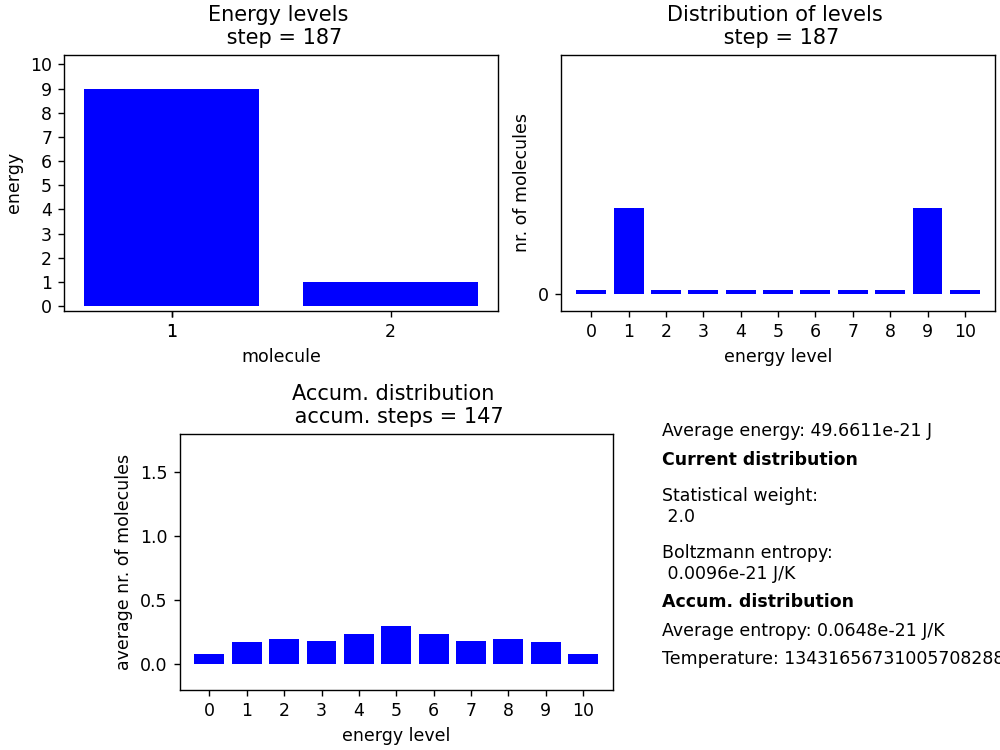

In [112]:
%matplotlib notebook

time_per_step = 200
units = 'default'

fig, animation_frame, frames_no = sc.run_simbo.show(rs, all_levels, all_distr, all_dist_sum, all_uav, all_wbolt, 
                                                    all_sw, all_sa, all_temp, units)
animation = FuncAnimation(fig, animation_frame, frames=frames_no, interval=time_per_step, repeat=False)

**The Boltzmann distribution**

The output from the averaged distribution allows us to calculate the temperature (as shown above) from a linear fit to the logarithm of the Boltzmann distribution as a function of the energy levels $n$
<p style="text-align:center; font-size:110%;">$\ln \rho_n$ ~ $\frac{n}{T}$.</p>

The next cell will calculate the probability distribution $\rho_n$ of the last step of the simulation and plot it as a function of the levels $n$, together with the ideal Boltzmann distribution. It will also plot the logarithm of $\rho_n$ as a function of $n$ and the fit from which the temperature is obtained (you can find the value of the temperature in the last image you get from the animation). This serves more as a comparison of how well the simulated distribution reproduces the Boltzmann distribution, so you don't have to execute this every time you run a simulation.

(Note: This is also in interactive mode, even though the data is not updating, so you can again save the graphs by clicking the save icon on the bottom right.)

<IPython.core.display.Javascript object>


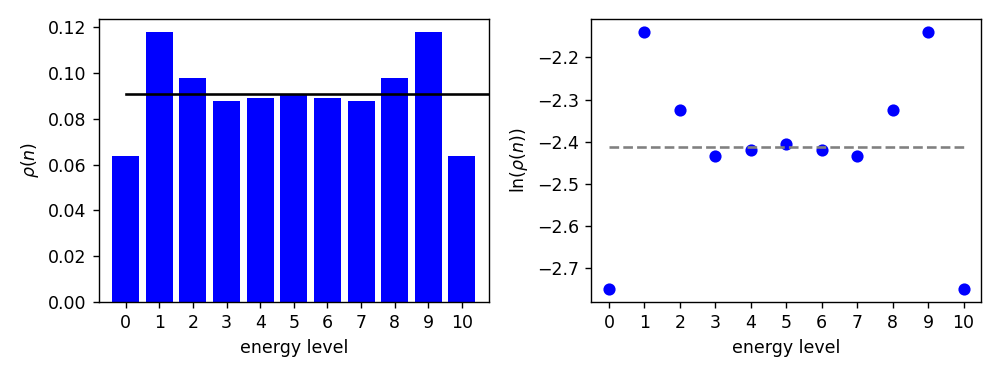

In [108]:
%matplotlib notebook
ex = sc.extra_functions(average_energy, number_of_molecules, nu)
sc.extra_functions.plot_prob_temp(ex, dist_sum, max_level)

Ok, now that you are familiar with the notebook, it's time to run some simulations. 

<h4 style="font-size:150%;">Tasks</h4>


**Task 1** 

Go back to the cell below the heading <i>Initial input</i> and set the number of molecules to 2. Execute the cell and move on to <i>Generating the intial state</i>. Now, instead of using the automatic generation of levels, generate a state in which both molecules are in the first excited state, i.e. fill in [1, 1] for the parameter <i>levels</i>. Run the simulation as before and save a picture of the resulting distributions (you can decrease <i>time_per_step</i> slightly to speed up the animation). During the animation, observe how the statistical weight changes and afterwards, write down all possible microstates and corresponding configurations. Deduce the probability of each configuration, and determine average number of molecules in each state from that.

   Run the same simulation, but with both molecules in a higher state, eg. levels = [5, 5]. Observe the statistical weight and at the end, take a picture of the final distribution. Try the same setup several times and compare the outcome (make sure to save a picture). Again, write down all possible microstates and corresponding configurations and deduce the probability of each configuration and average number of molecules. What do you observe?
   
   You may also note that the temperature looks strange here. Why do you think that is? (Hint: Try to plot the Boltzmann distribution and the corresponding fit.)
   

**Task 2** 

Run a simulation for 3 molecules with automatic generation of energy levels. What is the shape of the average distribution? Can you explain the result? (Hint: Analyze the statistical weight W for each of the possible configurations).

**Task 3** 

Repeat the simulation with larger number of molecules. Choose 3-4 values of $N$ in the range from 4 to 50. Note that the larger number of molecules is set, the longer simulations is needed to get reliable average distribution (a  reasonable value of number of steps may be 200*$N$). In each case, plot the final distribution over the energy levels in a logarithmic scale together with the "true" Boltzmann distribution. Observe how the calculated distribution approaches to the Boltzmann distribution with the growth of $N$. In each case, write down the average energy and calculated temperature. Compare with the exact result for the vibrational energy in a macroscopic system:

<p style="text-align:center; font-size:110%;">$E_{vib}/N =  1/(\exp^{(1/T)}-1)$</p>

in reduced units and

<p style="text-align:center; font-size:110%;">$E_{vib}/N = k_B \theta_{vib}/(\exp^{(\theta_{vib}/T)}-1)$</p>


in default units, where $\theta_{vib} = h c \tilde\nu / k_B$ is the vibrational temperature. Present the data in table form.

**Task 4**

For a given diatomic gas and given temperature (choose one from the table below), obtain average populations of the energy levels. 

Hints: You cannot enter temperature in the program directly. You can only set up an initial state of some given total energy (which also defines the average energy of a molecule), then the temperature will be calculated as a result of the simulation. So either use method of trials and errors, or evaluate the required energy by the analytic formula. 

| Molecule    | $\tilde\nu$ (cm$^{-1}$) |
|:-----------|:------------------------|
| O$_2$      | 1580   |
| F$_2$      | 892    |
| Cl$_2$     | 560    |
| Br$_2$     | 465    |
| HCl        | 2991   |

**Task 5**

Illustration of the second law of thermodynamics.

Prepare initial state for $N = 10$ molecules, and put the first molecule in a high energy state (for example, $n_1 = 12$), and other molecules in the ground state (go back to the manual generation of levels and put levels = [12, 0, 0, 0, 0, 0, 0, 0, 0, 0]). Look at the statistical weight $W$ and the Boltzmann entropy. How do they change? 
If you don't want to write down everything manually from the animation, you can use this extra function that will print both $W$ and $S$ for a specified interval (only within the accumulated steps, so you can not specify a start or and end that is larger than $40*N$). Again, you can select the units by setting <i>units</i> to 'default' or 'reduced' (remember the quotation marks).

In [23]:
start = 0
end = 10
units = 'default'

ex = sc.extra_functions(average_energy, number_of_molecules, nu)
sc.extra_functions.print_w_sw(ex, all_wbolt, all_sw, start, end, units)#start at step 0, end at step 10

step 0	 W =    2.0	 S_w = 0.0096e-21 J/K
step 1	 W =    2.0	 S_w = 0.0096e-21 J/K
step 2	 W =    2.0	 S_w = 0.0096e-21 J/K
step 3	 W =    2.0	 S_w = 0.0096e-21 J/K
step 4	 W =    2.0	 S_w = 0.0096e-21 J/K
step 5	 W =    2.0	 S_w = 0.0096e-21 J/K
step 6	 W =    2.0	 S_w = 0.0096e-21 J/K
step 7	 W =    2.0	 S_w = 0.0096e-21 J/K
step 8	 W =    2.0	 S_w = 0.0096e-21 J/K
step 9	 W =    1.0	 S_w = 0.0000e-21 J/K


**Task 6 (optional)**

For some fixed values of $N$ and average energy, eg. $N = 10$ and average energy 2, try to prepare initial state with

- minimal possible entropy
- with maximal possible entropy.

The cell below takes as input both of these parameters and generates a random state. The statistical weight will be calculated as well as the Boltzmann distribution, for which you can choose units 'default' or 'reduced' as before. It will plot the energy levels of the molecules as well, you can take a picture using the save icon in the bottom right if you like.

<IPython.core.display.Javascript object>


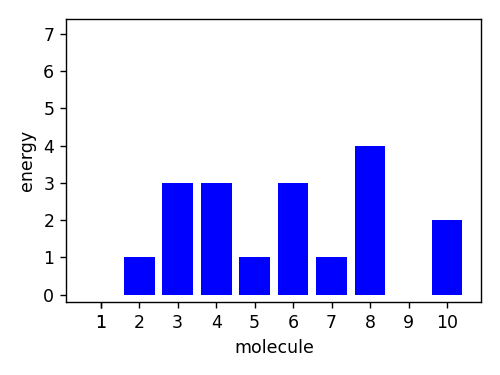

Statistical weight: 50400    Boltzmann entropy: 0.1495e-21 J/K


In [24]:
#task 6
number_of_molecules = 10
average_energy = 2
units = 'default'

ex = sc.extra_functions(average_energy, number_of_molecules, nu)
sc.extra_functions.get_w_sw(ex, average_energy, number_of_molecules, units)